## Make essential imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creation of the synthetic dataset

The dataset consists of 150 students which obtained 2 marks on the 2 exams taken. The task is to segregate students into 2 levels: Advanced and Basic. In this way the teacher would be able to focus in each group in a more accurate way.

In [2]:
STUDENTS = 150

In [3]:
dis1 = np.random.randn(STUDENTS)*2
dis2 = np.random.randn(STUDENTS)*2
X1 = np.clip(np.linspace(0, 10, STUDENTS)+dis1, 0, 10)
X2 = np.clip(np.linspace(0, 10, STUDENTS)+dis2, 0, 10)

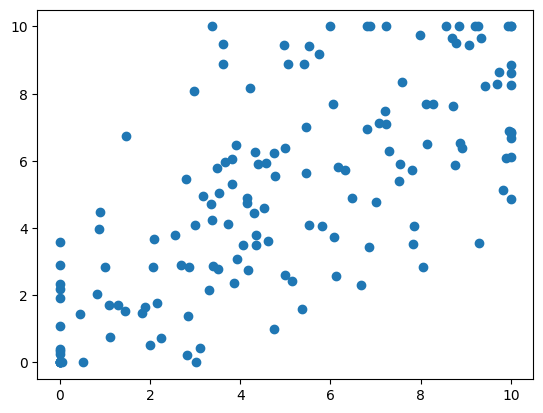

In [4]:
plt.scatter(X1, X2)
plt.show()

In [5]:
df = pd.DataFrame({'Exam1':X1, 'Exam2':X2})
df.head(5)

,Exam1,Exam2
0,1.883425,1.644761
1,1.297841,1.698628
2,0.000000,0.246595
3,0.000000,0.000000
4,0.000000,1.085737


## Run k-means algorithm

In [6]:
def init_centers():
  return {'mu0':np.array([np.random.randint(0, 10), np.random.randint(0, 10)]), 'mu1': np.array([np.random.randint(0, 10), np.random.randint(0, 10)])}

In [7]:
#This function sets the cluster centers for each student
def set_mu(X, mu, c):
  length = len(c)
  #For each student we assign a center, that'll be the closest one
  for i in range(length):
    c[i] = 'mu'+str(np.argmin(np.linalg.norm(X[i]-[i for i in mu.values()], axis=1)))
  return c

In [8]:
#This other function moves the centers towards the mean
def move_mu(X, mu, c):
    #We define a mask to compute the avareage of the students marks and move the cluster center towards the mean
    for i in mu.keys():
        mask = np.array([j == i for j in c])
        mask = mask.reshape(150, 1)
        mean = np.sum(X*mask, axis=0)/np.sum(mask)
        mu[i] = mean
    return mu

In [9]:
#We initialize our variable c (centers) to be an empty list of strings
c = ['' for i in range(STUDENTS)]

In [10]:
#We initialize our clustering centers
mu = init_centers()

Visualize initial data

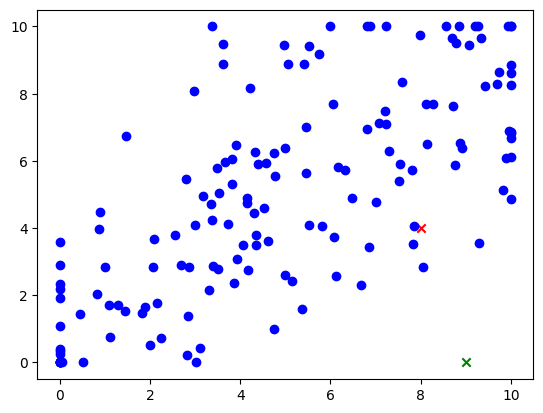

In [11]:
plt.scatter(mu['mu0'][0], mu['mu0'][1], color='red', marker='x')
plt.scatter(mu['mu1'][0], mu['mu1'][1], color='green', marker='x')
plt.scatter(X1, X2, color='blue')
plt.show()

In [12]:
X = df.to_numpy()
c_new, c_act = c, []

We iterate until the students' centers are no longer updated, what means that the clusters are already at the best spot

In [13]:
while(not(np.array_equal(c_new, c_act))):
    c_act = np.copy(c_new)
    c_new = np.copy(set_mu(X, mu, c_new))
    mu = move_mu(X, mu, c_new)
    print("Iteration done")
c = np.copy(c_new)

Iteration done
Iteration done
Iteration done
Iteration done
Iteration done
Iteration done
Iteration done


We plot the final results to visualize them

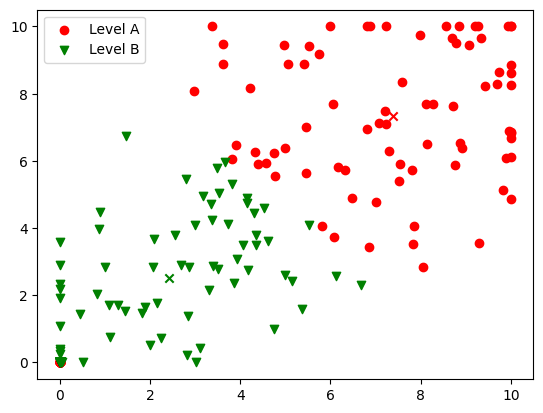

In [14]:
plt.scatter(mu['mu0'][0], mu['mu0'][1], color='red', marker='x')
plt.scatter(mu['mu1'][0], mu['mu1'][1], color='green', marker='x')

mask1 = np.array([j == 'mu0' for j in c]).reshape(150,)
mask2 = np.array([j == 'mu1' for j in c]).reshape(150,)
plt.scatter(X1*mask1, X2*mask1, color='red', marker='o', label='Level A')
plt.scatter(X1*mask2, X2*mask2, color='green', marker='v', label='Level B')
plt.legend()
plt.show()

## Save dataset to work later

In [15]:
df.to_csv('students.csv')